In [15]:
from lxml import etree

# Read the XML file as bytes
with open("экспорт.xml", "rb") as file:
    xml_content = file.read()

# Parse the XML content
root = etree.fromstring(xml_content)

# Define namespace mappings
namespaces = {
    'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main',
    'v': 'urn:schemas-microsoft-com:vml'
}

# Extract and print text from textboxes
for textbox in root.xpath('.//v:textbox', namespaces=namespaces):
    for text_elem in textbox.xpath('.//w:t', namespaces=namespaces):
        print(text_elem.text)


Квитанция взвешивания от 28.08.23 15:09
ООО
 "ТД"Карелия
 Неруд"
Дата|Время
№
 вагона
--------Вид
 груза--------
Груз-сть
Брутто
Тара
Нетто
Пр|Нд
Скор.
Поставщик|Адресат
  №
  
Тел.
 1
Тел.
 2
22.08.23
 12:08
Тепловоз
 ТЭМ2
115,80
-4,5
22.08.23
 12:08
1,1
57,90
58,00
22.08.23
 12:08
69,50
80,40
23,30
57,10
12,40
-4,6
22.08.23
 12:08
1,2
40,80
39,60
22.08.23
 12:09
87,40
-4,7
22.08.23
 12:09
1,3
42,70
44,70
22.08.23
 12:09
85,70
-4,7
22.08.23
 12:09
1,4
43,80
41,90
22.08.23
 12:09
87,90
-4,7
22.08.23
 12:09
1,5
44,60
43,30
22.08.23
 12:09
83,90
-4,9
22.08.23
 12:09
1,6
41,60
42,40
22.08.23
 12:09
86,40
-5,1
22.08.23
 12:09
1,7
43,20
43,20
22.08.23
 12:09
86,90
-5,2
22.08.23
 12:09
1,8
42,50
44,40
22.08.23
 12:10
86,50
-5,3
22.08.23
 12:10
1,9
42,80
43,60
22.08.23
 12:10
85,90
-5,4
22.08.23
 12:10
1,10
42,40
43,50
22.08.23
 12:10
86,20
-5,4
22.08.23
 12:10
1,11
44,30
41,90
22.08.23
 12:10
87,00
-5,5
22.08.23
 12:10
1,12
44,10
42,90
22.08.23
 12:10
86,30
-5,5
22.08.23
 12:10
1,13
42,10
44

In [23]:
import xml.etree.ElementTree as ET

# Parse the XML
tree = ET.parse('экспорт.xml')
root = tree.getroot()

# Define the XML namespaces used in your XML
namespaces = {
    'v': 'urn:schemas-microsoft-com:vml',
    'w': 'http://schemas.openxmlformats.org/wordprocessingml/2006/main'
}

# Iterate over the text boxes in the XML and extract position and text
results = []
for rect in root.findall(".//v:rect", namespaces):
    style = rect.get('style')
    # Extract position data from style attribute
    position_data = {}
    for pair in style.split(';'):
        name, _, value = pair.partition(':')
        position_data[name] = value

    # Get text data
    text_content = rect.find(".//w:t", namespaces)
    if text_content is not None:
        text = text_content.text
        results.append({
            'text': text,
            'position': position_data
        })

# Print the results
for item in results:
    print(item['text'])
    print("Position:", item['position']['margin-left'], item['position']['margin-top'])


Квитанция взвешивания от 28.08.23 15:09
Position: 257pt 37pt
ООО
Position: 9in 18pt
 "ТД"Карелия
Position: 676pt 18pt
 Неруд"
Position: 751pt 18pt
Дата|Время
Position: 42pt 66pt
№
Position: 108pt 66pt
 вагона
Position: 120pt 66pt
--------Вид
Position: 164pt 66pt
 груза--------
Position: 3in 66pt
Груз-сть
Position: 280pt 66pt
Брутто
Position: 328pt 66pt
Тара
Position: 368pt 66pt
Нетто
Position: 400pt 66pt
Пр|Нд
Position: 437pt 66pt
Скор.
Position: 480pt 67pt
Поставщик|Адресат
Position: 620pt 66pt
  №
Position: 16pt 66pt
  
Position: 35pt 66pt
Тел.
Position: 515pt 67pt
 1
Position: 538pt 67pt
Тел.
Position: 551pt 67pt
 2
Position: 574pt 67pt
22.08.23
Position: -1in 37pt
 12:08
Position: -33pt 37pt
Тепловоз
Position: 163pt 82pt
 ТЭМ2
Position: 207pt 82pt
115,80
Position: 331pt 82pt
-4,5
Position: 485pt 83pt
22.08.23
Position: 42pt 82pt
 12:08
Position: 81pt 82pt
1,1
Position: 16pt 82pt
57,90
Position: 517pt 83pt
58,00
Position: 553pt 83pt
22.08.23
Position: -1in 52pt
 12:08
Position: -33p

In [107]:
import re

# Read the contents of the file
with open("clear_position.txt", "r") as file:
    data = file.read()

# Find all the y-positions corresponding to dates in the specified format
date_pattern = r'(\d{2}\.\d{2}\.\d{2})\s+Position: \d+pt (\d+\.?\d*)pt'
matches = re.findall(date_pattern, data)

# Grouping y-positions by date
date_to_y_positions = []
for date, y in matches:
    date_to_y_positions.append(float(y))
date_to_y_positions = sorted(list(set(date_to_y_positions)))
print(date_to_y_positions)


[82.0, 97.0, 111.0, 125.0, 140.0, 154.0, 169.0, 183.0, 197.0, 212.0, 226.0, 241.0, 255.0, 269.0, 284.0, 298.0, 313.0, 327.0, 341.0, 356.0, 370.0, 385.0, 399.0, 413.0, 428.0, 442.0, 457.0, 471.0, 485.0, 500.0, 514.0, 529.0]


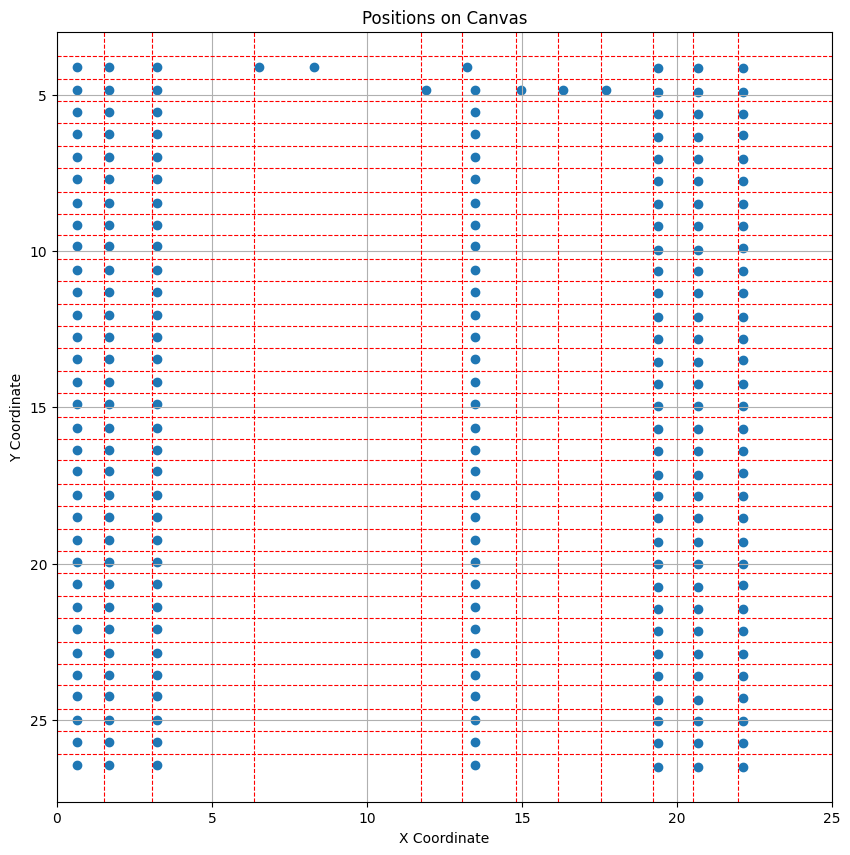

In [108]:
import matplotlib.pyplot as plt
import re

# Read the contents of the file
# with open("position.txt", "r") as file:
with open("clear_position.txt", "r") as file:
# with open("clear_position_2.txt", "r") as file:
    data = file.read()

# Extract all positions using regex
positions = re.findall(r'Position: (\d+\.?\d*)pt (\d+\.?\d*)pt', data)

# Split the x and y coordinates
x_coords = [float(x) for x, _ in positions]
y_coords = [float(y) for _, y in positions]

# Normalize if necessary (depending on the size of your canvas and the range of your coordinates)
# Here, as an example, I'm multiplying by a factor for visualization. Adjust as needed.
x_coords = [x * 0.04 for x in x_coords]
y_coords = [y * 0.05 for y in y_coords]

plt.figure(figsize=(10, 10))
plt.scatter(x_coords, y_coords)

x_borders = [x - 4 for x in [0, 42, 81, 163, 298, 331, 374, 408, 443, 485, 517, 553]]
y_borders = [y - 7 for y in date_to_y_positions]

# Draw several vertical and horizontal lines
for x_line in x_borders:  # You can change these values to your needs
    plt.axvline(x=x_line*0.04, color='red', linestyle='--', linewidth=0.8)

for y_line in y_borders:  # Again, adjust these values as needed
    plt.axhline(y=y_line* 0.05, color='red', linestyle='--', linewidth=0.8)


# Set x-axis limits
plt.xlim(0, 25)

plt.gca().invert_yaxis()  # This will make the top left corner (0,0) as is common with many graphics systems
plt.title('Positions on Canvas')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()


In [111]:
import pandas as pd

# List of desired column names
columns = ["№", "Дата", "Время", "№ вагона", "Вид груза", "Груз-сть", "Брутто", "Тара", "Нетто", "Пр|Нд", "Скор.", "Тел. 1", "Тел. 2"]  # Add more names if required

# Create an empty DataFrame with the desired column names
df = pd.DataFrame(columns=columns)

print(df)

Empty DataFrame
Columns: [dog, cat, bird, fish]
Index: []
